In [1]:
# 导入所需要的模块
from sklearn import tree #树的模块
from sklearn.datasets import load_wine #导入红酒数据集
from sklearn.model_selection import train_test_split # 划分数据集的模块


In [2]:
# 探索数据
wine = load_wine()
# 数据有178个样本，13个特征
wine.data.shape, wine.target

((178, 13),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [3]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.feature_names, wine.target_names

(['alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'flavanoids',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue',
  'od280/od315_of_diluted_wines',
  'proline'],
 array(['class_0', 'class_1', 'class_2'], dtype='<U7'))

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
Xtrain.shape, Xtest.shape

((124, 13), (54, 13))

In [5]:
# 建立模型
clf = tree.DecisionTreeClassifier(criterion="entropy")# 实例化模型，添加criterion参数
clf = clf.fit(Xtrain, Ytrain)# 使用实例化好的模型进行拟合操作
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.8888888888888888

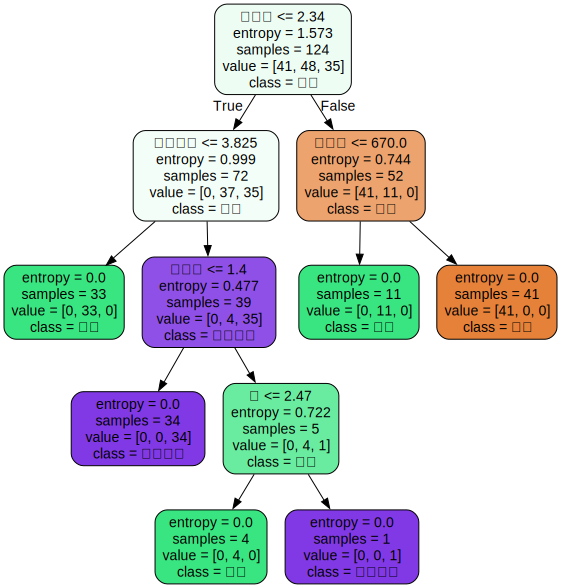

In [6]:
# 对数据进行可视化
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf #训练好的模型
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True  #进行颜色填充
                                ,rounded=True #树节点的形状控制
)
graph = graphviz.Source(dot_data)
graph

In [7]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [9]:
# use my own data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
dt_path = "../filestorage/upload/sample.csv"
le = LabelEncoder()
df = pd.read_csv(dt_path)
df_num = pd.DataFrame()
for col in df.columns:
    label = le.fit_transform(df[col])
    df_num[col] = label


In [11]:
X = df_num[df_num.columns[:-1]].values
y = df_num[df_num.columns[-1]].values
X, y

(array([[2, 1, 0, 0],
        [2, 1, 0, 1],
        [0, 1, 0, 0],
        [1, 2, 0, 0],
        [1, 0, 1, 0],
        [1, 0, 1, 1],
        [0, 0, 1, 1],
        [2, 2, 0, 0],
        [2, 0, 1, 0],
        [1, 2, 1, 0],
        [2, 2, 1, 1],
        [0, 2, 0, 1],
        [0, 1, 1, 0],
        [1, 2, 0, 1]]),
 array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]))

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3)
Xtrain.shape, Xtest.shape

((9, 4), (5, 4))

In [16]:
clf = tree.DecisionTreeClassifier(criterion="entropy")# 实例化模型，添加criterion参数
clf = clf.fit(X, y)# 使用实例化好的模型进行拟合操作
score = clf.score(X,y) #返回预测的准确度
score

1.0

Index(['Outlook', ' Temperature', ' Humidity', ' Windy'], dtype='object')


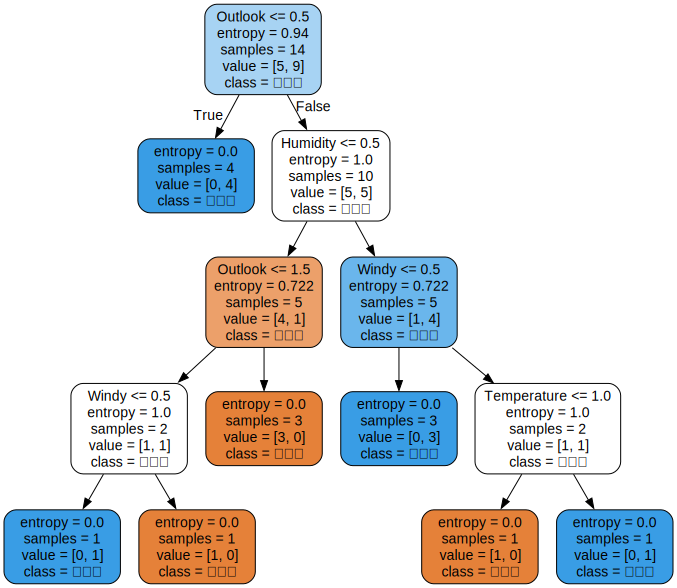

In [19]:
feature_name = df_num.columns[:-1]
print(feature_name)

dot_data = tree.export_graphviz(clf #训练好的模型
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["出去玩", "待家里"]
                                ,filled=True  #进行颜色填充
                                ,rounded=True #树节点的形状控制
)
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.save("tree.dot")

'tree.dot'

In [24]:
from os import popen
popen("dot -Tpng tree.dot -o tree.png")